# Credit Card Fraud Detection

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

Observation: <br>
1)There are 284807 data points i.e this many no.of transactions<br>
2)There are 31 Features i.e 31 dimensions

## Description

Time -> Its the seconds elapsed between each transaction and the first transaction in the dataset
<br>
Class: 1 -> fraud, 0 -> no harm

## Analysis

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
percentageOfFraud = 492/(492+284315)
percentageOfFraud*100

0.1727485630620034

Note: 0.17% of transactions are Fraud

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Observation: Total transactions 284807 happened in 172792 sec's

## BiVariant Analysis

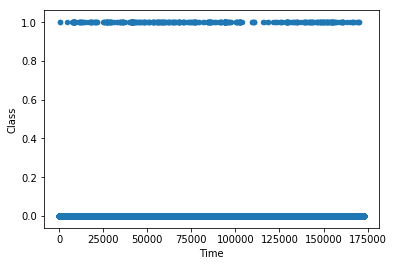

In [8]:
df.plot(x='Time',y='Class',kind='scatter')
plt.show()

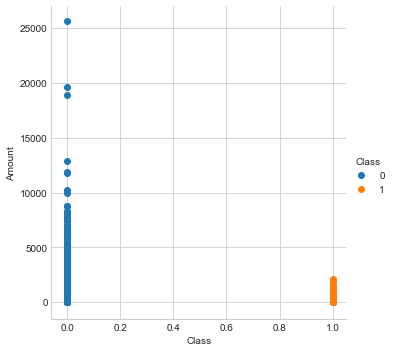

In [9]:
sns.set_style("whitegrid")

sns.FacetGrid(df,hue='Class',size=5) \
    .map(plt.scatter,'Class','Amount') \
    .add_legend()
plt.show()

Observation:<br>

All the Fraud Transactions(Class 1) happened with Transaction amount less than 2500~ /-

### Pair Plot

In [10]:
subDf = df[['Time','Amount','Class']]

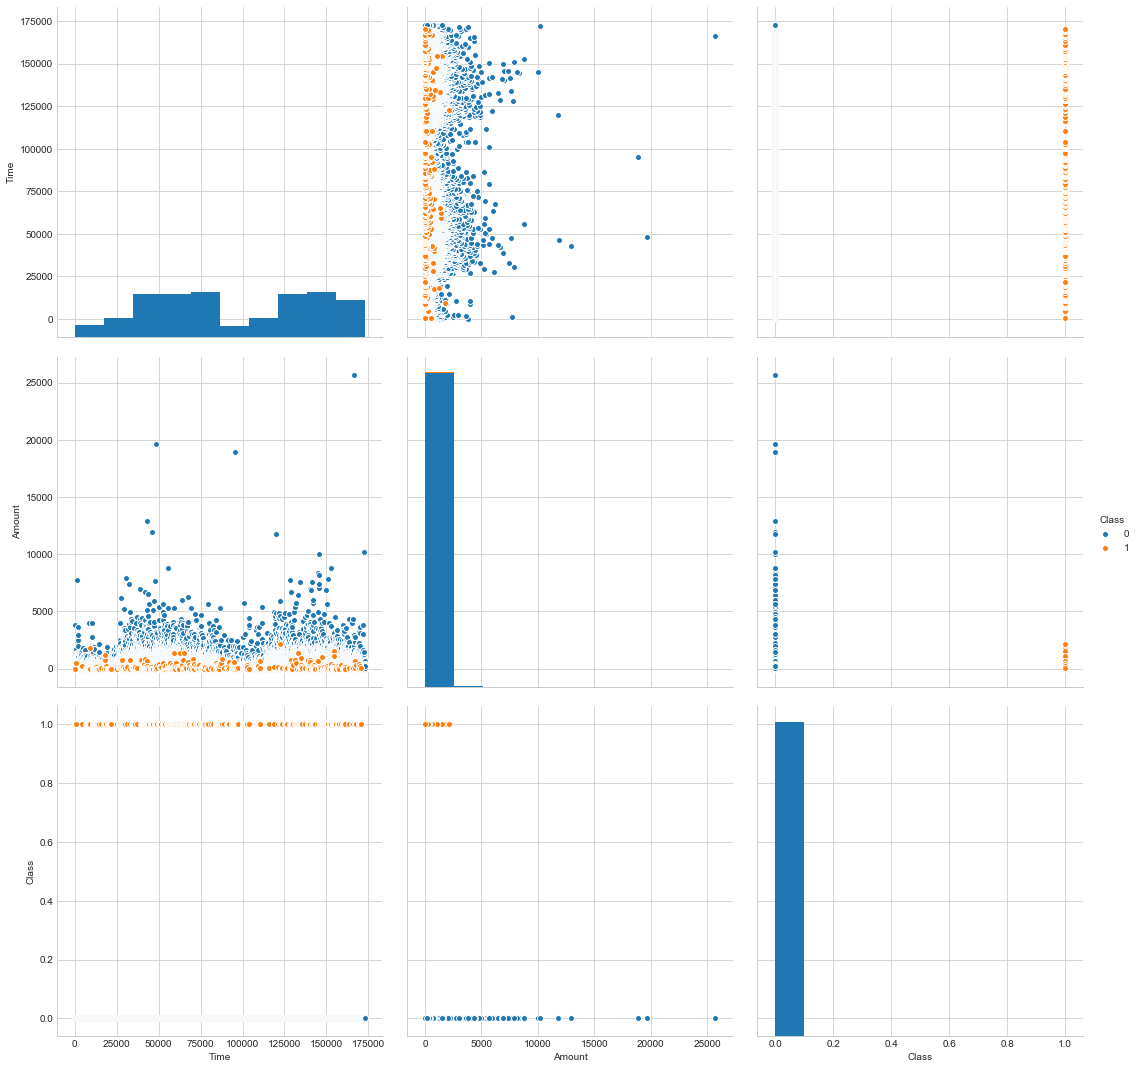

In [11]:
sns.set_style("whitegrid");

sns.pairplot(subDf,hue='Class',size=5)
plt.show()


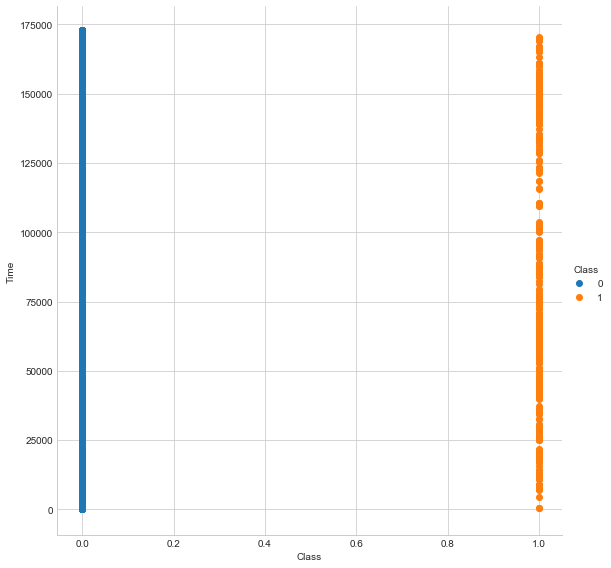

In [12]:
sns.set_style("whitegrid")

sns.FacetGrid(df,hue='Class',size=8) \
    .map(plt.scatter,'Class','Time') \
    .add_legend()
plt.show()

## Univariant Analysis

### PDF

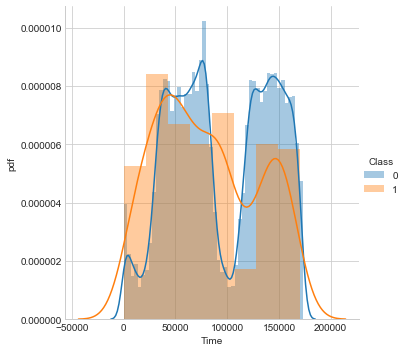

In [13]:
sns.FacetGrid(df, hue="Class", size=5) \
   .map(sns.distplot, "Time") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

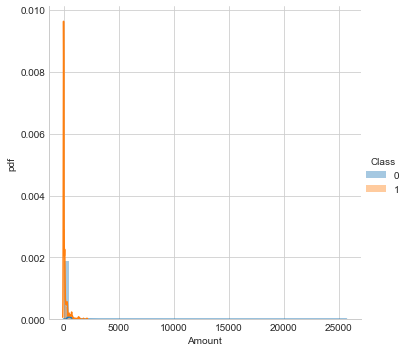

In [14]:
sns.FacetGrid(df, hue="Class", size=5) \
   .map(sns.distplot, "Amount") \
   .add_legend();
plt.ylabel('pdf')
plt.show();

In [15]:
amt = df[['Amount']]
np.median(amt)


22.0

100


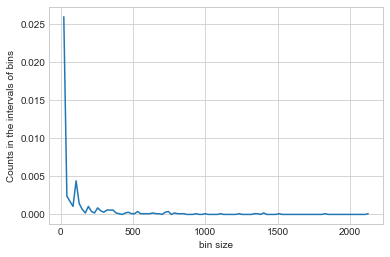

In [84]:
counts, bin_edges = np.histogram(amtClass1,bins=100,density=True)

print(len(counts));


plt.plot(bin_edges[1:],counts);
plt.xlabel('bin size');
plt.ylabel('Counts in the intervals of bins')
plt.show();

In [83]:
pdf= counts/(sum(counts))


In [82]:
#computing CDF
cdf = np.cumsum(pdf) #calc's Cumulative sum like compounding.


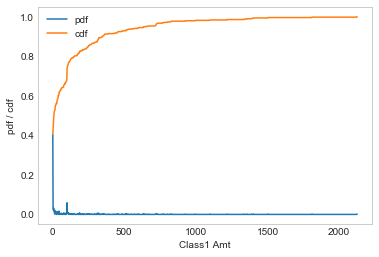

In [77]:
plt.xlabel('Class1 Amt')
plt.ylabel('pdf / cdf')
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:],cdf,label='cdf');
plt.legend()
plt.grid()
plt.show()

### Calculating 'Mode' of Amount for Class 1

In [36]:
amtClass1 = df['Amount'][df['Class']==1]
mat = amtClass1.as_matrix();

amtClass1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [45]:
import collections
print(type(mat.tolist()))

q =mat.tolist();

ll=[int(i) for i in q]


modeOfClass1Amt = collections.Counter(ll)
modeOfClass1Amt
#x.most_common(1)

<class 'list'>


Counter({0: 68,
         1: 127,
         2: 10,
         3: 10,
         4: 6,
         5: 4,
         6: 4,
         7: 9,
         8: 6,
         9: 5,
         10: 1,
         11: 4,
         12: 3,
         14: 1,
         16: 1,
         17: 2,
         18: 4,
         19: 6,
         22: 2,
         23: 1,
         24: 1,
         25: 1,
         29: 1,
         30: 6,
         31: 1,
         33: 2,
         34: 1,
         35: 1,
         37: 2,
         38: 1,
         39: 4,
         40: 1,
         42: 1,
         44: 2,
         45: 6,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         57: 1,
         59: 2,
         60: 2,
         65: 1,
         67: 1,
         75: 1,
         76: 1,
         77: 1,
         78: 2,
         80: 2,
         83: 1,
         84: 1,
         88: 3,
         93: 1,
         94: 2,
         97: 1,
         98: 1,
         99: 29,
         101: 2,
         104: 4,
         105: 3,
         106: 2,
         108: 1,
       

In [46]:
import operator
res = max(modeOfClass1Amt.items(), key=operator.itemgetter(1))
res

(1, 127)

Observation: <br>

out of 492 fraud transactions, Rupee 1/- was the Transaction amount for 127 transactions and Rupees 0/- for 68 transactions

### Box Plot

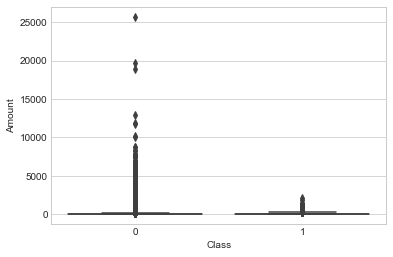

In [47]:
sns.boxplot(x='Class',y='Amount',data=df)
plt.show();

In [3]:
s1 = df[df['Class']==0]
sampleClass1=s1[0:1000];

s2 = df[df['Class']==1]
sampleClass2=s2[0:5];

sample = sampleClass1.append(sampleClass2)
sample.shape

(1005, 31)

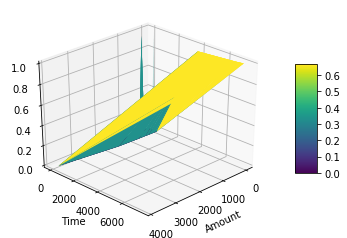

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(sample['Amount'],  sample['Time'], sample['Class'],cmap=plt.cm.viridis, linewidth=0.2)
plt.ylabel('Time')

plt.xlabel('Amount')

surf=ax.plot_trisurf(sample['Amount'],sample['Time'], sample['Class'],  cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)

ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(sample['Amount'],  sample['Time'],sample['Class'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()
plt.show()


### Violin Plot

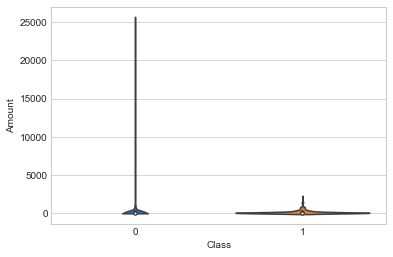

In [64]:
sns.violinplot(x='Class',y='Amount',data=df,size=8)
plt.show();

Observation:<br> 
From the above fig we can observe that for class 1 the spread is more at the amount 0 and 1 and Max amount in this class is nearly 2200, i.e transactions with transaction amount more than 2200 has not recorded as fraud Transaction according to our dataset. 

# t-SNE

In [9]:
s1 = df[df['Class']==0]
sampleClass1=s1[0:50000];

s2 = df[df['Class']==1]
sampleClass2=s2[0:86];

sample = sampleClass1.append(sampleClass2)
sample.shape
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
classes = sample['Class']

sample = sample.drop("Class",axis=1)
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


#### Standardizing the data i.e Column Standardization -> mean=0 std=1

In [11]:
from sklearn.preprocessing import StandardScaler
stdzidData = StandardScaler().fit_transform(sample)
stdzidData.shape

(50086, 30)

### Dont execute this bcz it takes huge time use the below pickle file as this computed data is present in that file

In [12]:


from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

(3, 50086)


,Dim1,Dim2,Class
0,-2.865398,32.480297,0.0
1,9.389415,40.522285,0.0
2,-25.983303,58.080898,0.0
3,-15.228042,52.765938,0.0
4,-3.121813,36.822411,0.0


In [16]:
# creating pickle file for this 50k data points as 
# this took huge time to compute

import pickle

pickle_out = open("50KDataPointsTsne.pickle","wb")
pickle.dump(tsne_df,pickle_out)
pickle_out.close()

In [17]:
# getting tsne_df from the pickle file into 
# which we have loaded in the above step

pickle_in=open("50KDataPointsTsne.pickle","rb")
tsne_df = pickle.load(pickle_in)

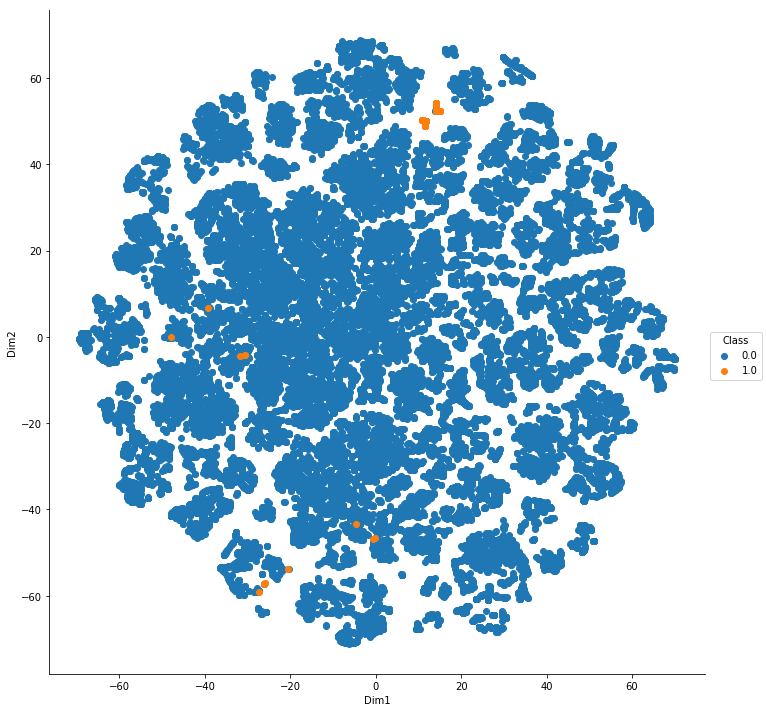

In [18]:
sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()